In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('../artifacts/milknew.csv')
df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


## Data preprocessing

In [3]:
df.shape

(1059, 8)

In [4]:
df["Grade"].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

In [5]:
# Convert categorical 'Grade' to numerical values
grade_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['Grade'] = df['Grade'].map(grade_mapping)


In [6]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [7]:
# Separate features and target variable
X = df.drop('Grade', axis=1)
y = df['Grade']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
331,6.8,40,1,0,1,0,245
44,6.6,45,0,0,0,1,250
307,6.8,45,1,1,1,0,245
323,9.0,43,1,0,1,1,250
1009,9.0,43,1,0,1,1,250
...,...,...,...,...,...,...,...
330,9.0,43,1,0,1,1,250
466,6.7,45,1,1,1,0,245
121,6.5,36,0,0,1,0,255
1044,6.6,50,0,0,0,1,250


In [10]:
y_train

331     1
44      1
307     2
323     0
1009    0
       ..
330     0
466     1
121     1
1044    0
860     2
Name: Grade, Length: 847, dtype: int64

In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
y_train.value_counts()

Grade
0    351
1    288
2    208
Name: count, dtype: int64

In [13]:
# Balance the training data using RandomUnderSampler
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_scaled, y_train)

In [14]:
y_train_resampled.value_counts()

Grade
0    208
1    208
2    208
Name: count, dtype: int64

## Model Trainning and Evaluation

### Logistic Regression

In [15]:
# Hyperparameter optimization using GridSearchCV
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1, n_jobs=-1)
log_reg_grid.fit(X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=1)

In [16]:
# Best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", log_reg_grid.best_params_)

Best hyperparameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


In [17]:
# Evaluate Logistic Regression model on training data
log_reg_train_pred = log_reg_grid.predict(X_train_resampled)
print("Logistic Regression Training Classification Report:")
print(classification_report(y_train_resampled, log_reg_train_pred))



Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       208
           1       0.98      0.82      0.89       208
           2       0.77      0.95      0.85       208

    accuracy                           0.87       624
   macro avg       0.89      0.87      0.87       624
weighted avg       0.89      0.87      0.87       624



In [18]:
# Calculate and print Logistic Regression accuracy on training data
log_reg_train_accuracy = accuracy_score(y_train_resampled, log_reg_train_pred)
print(f"Logistic Regression Accuracy on Training Data: {log_reg_train_accuracy}")

Logistic Regression Accuracy on Training Data: 0.8717948717948718


In [19]:
# Evaluate Logistic Regression model on testing data
log_reg_test_pred = log_reg_grid.predict(X_test_scaled)
print("Logistic Regression Testing Classification Report:")
print(classification_report(y_test, log_reg_test_pred))


Logistic Regression Testing Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        78
           1       0.93      0.83      0.88        86
           2       0.64      0.88      0.74        48

    accuracy                           0.83       212
   macro avg       0.82      0.84      0.82       212
weighted avg       0.85      0.83      0.84       212



In [20]:

# Calculate and print Logistic Regression accuracy on testing data
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_pred)
print(f"Logistic Regression Accuracy on Testing Data: {log_reg_test_accuracy}")

Logistic Regression Accuracy on Testing Data: 0.8301886792452831


In [21]:
# Create a confusion matrix for Logistic Regression
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_test_pred)

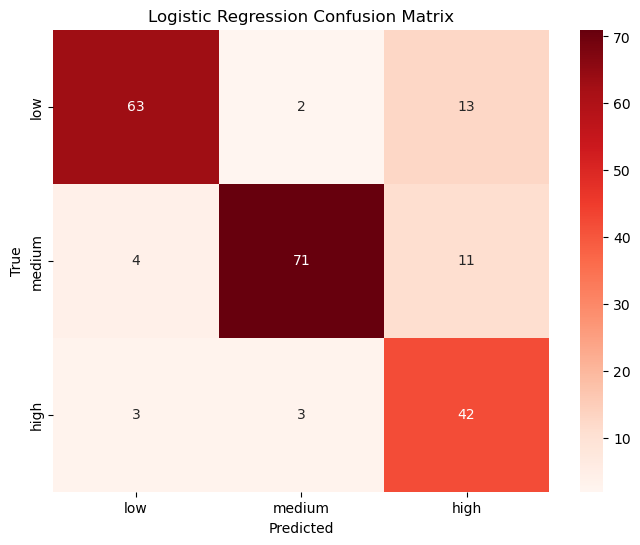

In [22]:
# Plot the heatmap for Logistic Regression confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=grade_mapping.keys(), yticklabels=grade_mapping.keys())
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier


In [24]:
# Hyperparameter optimization using GridSearchCV
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, verbose=1, n_jobs=-1)
tree_grid.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [25]:
# Best hyperparameters for Decision Tree
print("Best hyperparameters for Decision Tree:", tree_grid.best_params_)

Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


In [26]:
# Evaluate Decision Tree model on training data
tree_train_pred = tree_grid.predict(X_train_resampled)
print("Decision Tree Training Classification Report:")
print(classification_report(y_train_resampled, tree_train_pred))



Decision Tree Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       208
           2       1.00      1.00      1.00       208

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



In [27]:
# Calculate and print Decision Tree accuracy on training data
tree_train_accuracy = accuracy_score(y_train_resampled, tree_train_pred)
print(f"Decision Tree Accuracy on Training Data: {tree_train_accuracy}")

Decision Tree Accuracy on Training Data: 1.0


In [28]:
# Evaluate Decision Tree model on testing data
tree_test_pred = tree_grid.predict(X_test_scaled)
print("Decision Tree Testing Classification Report:")
print(classification_report(y_test, tree_test_pred))


Decision Tree Testing Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        78
           1       0.98      1.00      0.99        86
           2       0.98      0.98      0.98        48

    accuracy                           0.99       212
   macro avg       0.99      0.98      0.98       212
weighted avg       0.99      0.99      0.99       212



In [29]:
# Calculate and print Decision Tree accuracy on testing data
tree_test_accuracy = accuracy_score(y_test, tree_test_pred)
print(f"Decision Tree Accuracy on Testing Data: {tree_test_accuracy}")

Decision Tree Accuracy on Testing Data: 0.9858490566037735


In [30]:
# Create a confusion matrix for Decision Tree
tree_conf_matrix = confusion_matrix(y_test, tree_test_pred)


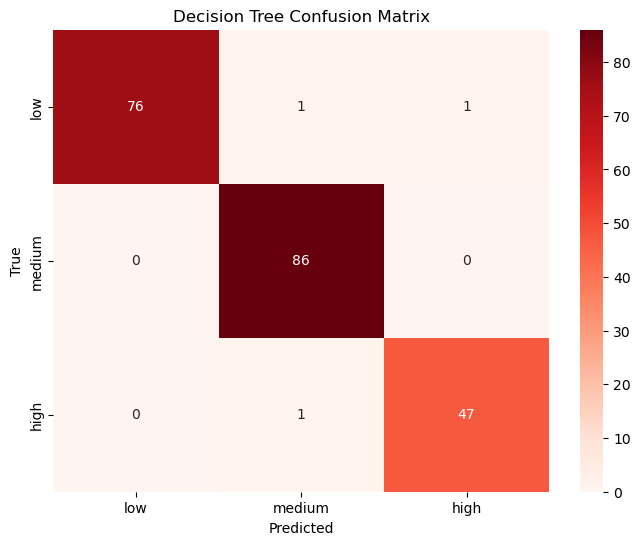

In [31]:
# Plot the heatmap for Decision Tree confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(tree_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=grade_mapping.keys(), yticklabels=grade_mapping.keys())
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Save and Load Model

In [32]:
import pickle


### LR

In [33]:
import pickle

# Save the trained Logistic Regression model
model_filename = '../static/model/logistic_regression_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(log_reg_grid.best_estimator_, model_file)

# Save the necessary data (scaler, sampler, etc.)
data_filename = '../static/model/logistic_regression_data.pkl'
with open(data_filename, 'wb') as data_file:
    pickle.dump((scaler, sampler), data_file)


In [34]:
# Load the trained Logistic Regression model
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the necessary data (scaler, sampler, etc.)
with open(data_filename, 'rb') as data_file:
    loaded_data = pickle.load(data_file)
loaded_scaler, loaded_sampler = loaded_data

In [35]:

# Input features for prediction
pH = 6.7
Temprature = 38
Taste = 1
Odor = 0
Fat = 1
Turbidity = 0
Colour = 255



#Preprocess the input features
input_features = pd.DataFrame([[pH, Temprature, Taste, Odor, Fat, Turbidity, Colour]], columns=X.columns)
input_features_scaled = loaded_scaler.transform(input_features)

# Make prediction using the loaded model
prediction = loaded_model.predict(input_features_scaled)

# Convert numerical prediction back to original label
predicted_label = {0: 'low', 1: 'medium', 2: 'high'}[prediction[0]]

# Display the prediction
print("Predicted Grade:", predicted_label)


Predicted Grade: high


### DT

In [36]:


# Save the trained Decision Tree model
tree_model_filename = '../static/model/decision_tree_model.pkl'
with open(tree_model_filename, 'wb') as tree_model_file:
    pickle.dump(tree_grid, tree_model_file)

# Save the necessary data (scaler, sampler, etc.)
tree_data_filename = '../static/model/decision_tree_data.pkl'
with open(tree_data_filename, 'wb') as tree_data_file:
    pickle.dump((scaler, sampler), tree_data_file)


In [37]:
# Load the trained Decision Tree model
with open(tree_model_filename, 'rb') as tree_model_file:
    loaded_tree_model = pickle.load(tree_model_file)

# Load the necessary data (scaler, sampler, etc.)
with open(tree_data_filename, 'rb') as tree_data_file:
    loaded_tree_data = pickle.load(tree_data_file)
loaded_tree_scaler, loaded_tree_sampler = loaded_tree_data


In [38]:

# Input features for prediction
pH = 6.7
Temprature = 38
Taste = 1
Odor = 0
Fat = 1
Turbidity = 0
Colour = 255

# Preprocess the input features
input_features = pd.DataFrame([[pH, Temprature, Taste, Odor, Fat, Turbidity, Colour]], columns=X.columns)
input_features_scaled = loaded_tree_scaler.transform(input_features)

# Make prediction using the loaded model
prediction = loaded_tree_model.predict(input_features_scaled)

# Convert numerical prediction back to original label
predicted_label = {0: 'low', 1: 'medium', 2: 'high'}[prediction[0]]

# Display the prediction
print("Predicted Grade:", predicted_label)


Predicted Grade: high
